In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
Pokemondataframe = pd.read_csv("C:/Users/lenovo/Downloads/Pokemon.csv",encoding = "ISO-8859-1")
Pokemondataframe.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Here we can see the composition of our data, we've got 7 quantitative varibales which are "HP" , "Attack" , "Defense" , "Sp.Atk", "Sp.Def" , "Speed" and "Total".
While we have 5 qualitative variables "Name", "Type 1" , "Type 2" ,"Stage" and "Legendary".


## Univariate analysis : 

### Univariate analysis on Qualitatives : 

Lets begin by study our qualitative variables, the colun name is not very interesting while each pokemon has its unique name and it doesn't indicate much more information but let's study the other columns. Like we saw in the statistic chapter, when it comes to qualitative variables, we have to study the Frequency and relative frequency:

In [3]:
pd.crosstab(index=Pokemondataframe['Type 1'], columns="count")

col_0,count
Type 1,
Bug,12
Dragon,3
Electric,9
Fairy,2
Fighting,7
Fire,12
Ghost,3
Grass,12
Ground,8


As we can see we have a majority of water types and normal types, while the fairy , ice , ghost and dragons represent a minority. This will confirmed thanks to the barplot and pie chart below.

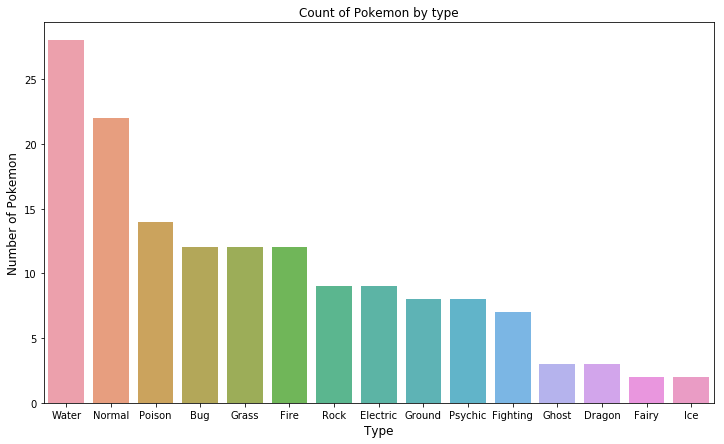

In [4]:
Type_count  = Pokemondataframe['Type 1'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(Type_count.index, Type_count.values, alpha=0.9)
plt.title('Count of Pokemon by type')
plt.ylabel('Number of Pokemon', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

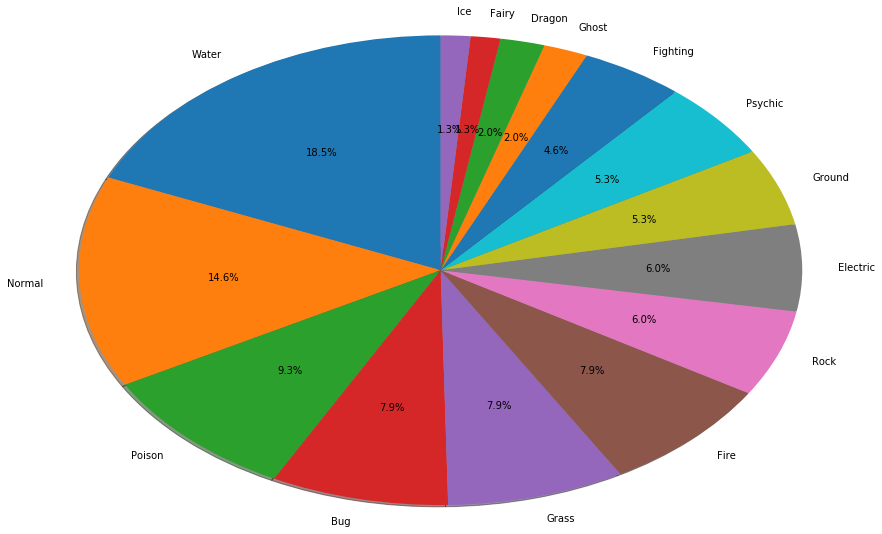

In [5]:
plt.pie(Type_count.values, labels=Type_count.index, startangle=90, autopct='%1.1f%%',shadow=True,radius=2.7 )
plt.show()

In [6]:
pd.crosstab(index=Pokemondataframe['Legendary'], columns="count")

col_0,count
Legendary,
False,147
True,4


no need to represent this one, the legendary are clearly a minority. Kinda obvious while they are legendary pokemons

In [7]:
pd.crosstab(index=Pokemondataframe['Stage'], columns="count")

col_0,count
Stage,
1,79
2,56
3,16


we got a little struggle here nowing that there is pokemon that can evolve three times, others evolves two times and there is some pokemons that doesn't evolve at all. So let's create a new column that we will call 'final form' to indicate if the pokemon is in his final form or not.

In [8]:
for cpt,elem in enumerate(Pokemondataframe['Stage']) : 
    if (cpt<150):
        if (Pokemondataframe['Stage'][cpt+1] > Pokemondataframe['Stage'][cpt]):
            reponse=False
        else:
            reponse=True
    Pokemondataframe.at[cpt,'FinalForm'] = reponse

In [9]:
Pokemondataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary,FinalForm
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False,True
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False,True
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False,True
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,False


In [10]:
pd.crosstab(index=Pokemondataframe['FinalForm'], columns="count")

col_0,count
FinalForm,
False,70
True,81


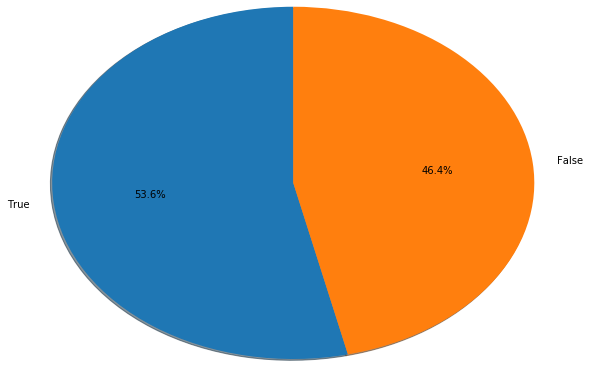

In [11]:
plt.figure(figsize=(4,3))
Type_count  = Pokemondataframe['FinalForm'].value_counts()
plt.pie(Type_count.values, labels=Type_count.index, startangle=90, autopct='%1.1f%%',shadow=True,radius=2.7 )
plt.show()

So we can see that almost of the pokemons present in our dataset are in final form, these statement will be very important later. Let's dig more into the process of evolution, for this one we gonna study how many pokemons evolves 3 times, 2 times et compare these values with the number of pokemon that doesn't evolve.

## Univariate Analysis on Quantitatives 

In [12]:
EvolutionDataframe = Pokemondataframe.groupby( [ "Stage", "FinalForm"] ).size().unstack()
EvolutionDataframe

FinalForm,False,True
Stage,,
1,54.0,25.0
2,16.0,40.0
3,NaN,16.0


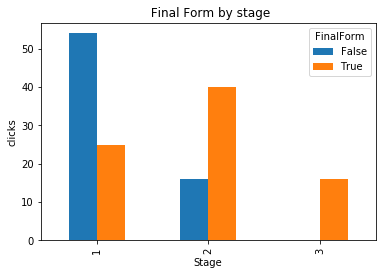

In [13]:
EvolutionDataframe.plot(kind = 'bar', title = ' Final Form by stage')
plt.ylabel('clicks')
plt.show()

As we can the majority of our evolving pokemons reach their final form in the second Stage. We also notice that there is twice more evolving pokemons than non-evolving ones (look at the first stage plot)

### Univariate Analysis on Quantitatives 

In [14]:
Pokemondataframe.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


First Step is to look in the central tendancy measures , (we gonna neglect the '#' and 'stage' because even that they contains numerical values, they're not quantitative values).
First observation is that standard deviation is almost equal in Attack,Defencen, Sp.Attack, Sp.Def and Speed. Means that the distribution of the value for each one is almost the same.
Let's do some visualisation, Box plots i choose you!

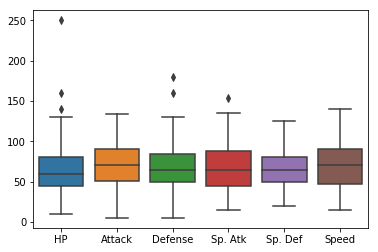

In [28]:
stats_Pokemondf = Pokemondataframe.drop(['Total', 'Stage', 'Legendary','#','FinalForm'], axis=1)
sns.boxplot(data=stats_Pokemondf)


Interesting, we notice so little differences between the charractertic of our pokemon, almost of them are symetrical, and some outliers appears in HP, Defence and sp.Atttack. So we will have to dig deeper to find some more interesting conclusions. For now all we can say is that the distributions of the statistics of each pokemon are homogeneous

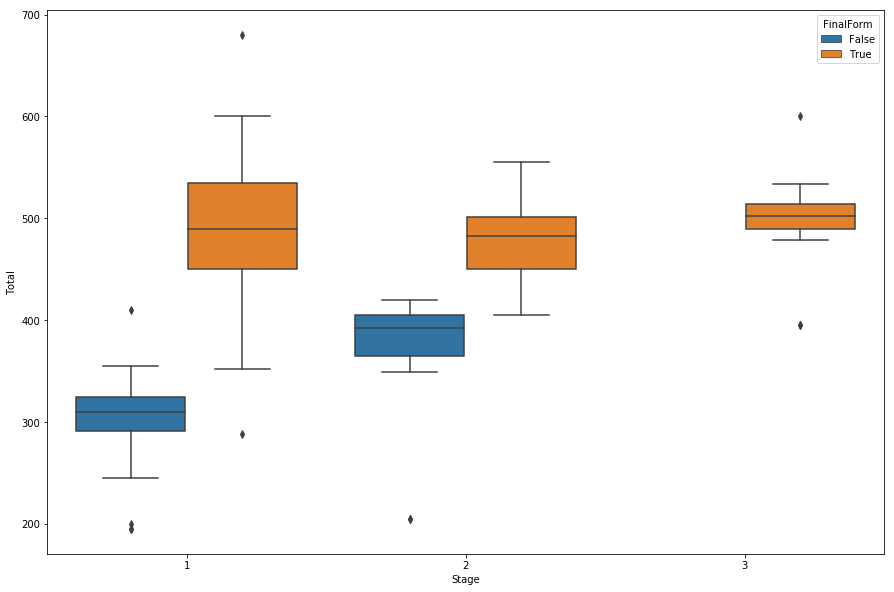

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(ax=ax,x='Stage',y='Total',data=Pokemondataframe,hue='FinalForm')

here we have the boxplots concerning the feature 'Total' which is a feature that is a sum of the other characteristic. The boxplots are diplayed in a interesting way where we take count of the stage and if the pokemon is in it's final form or not.
We can make some conclusions here:
1) the pokemons that evolves three times when they reach their final form have very high characteristics 
2) Concerning the pokemon that doesn't evolve, we can see that the distribution is not homogneous, means that even if a Pokemon doesn't evolve he can have very high statistics; those statistics are for 75% of non evolving pokemons are even better that those who perform a second evolution.
3) Pokemon that evolves 3 times, are the the weakest when they are in their first stage

for this one we gonna visualize the histograms of each characteristic of our pokemons, the line will represent the median. It's clearly that we have a wide distribution concercning Attack,Speed, sp Attak and sp Defence. But the Hp and Sp Attak it's more homogenous. Let's see if the factb that our pokemon evolves can make it more homogenous

Text(0.5,1,'Health Points')

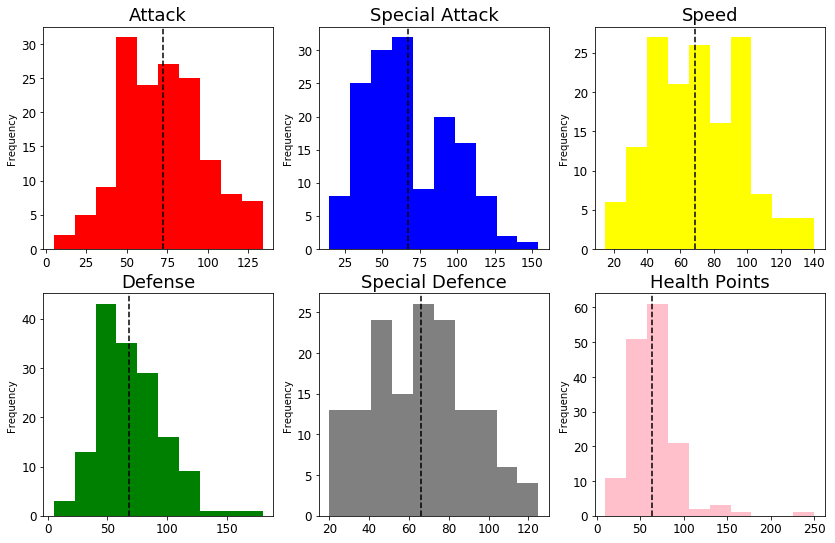

In [17]:

fig, axarr = plt.subplots(2, 3, figsize=(14, 9))

Pokemondataframe['Attack'].plot.hist(
    ax=axarr[0][0], fontsize=12, color='red'
)
axarr[0][0].axvline(Pokemondataframe['Attack'].mean(),linestyle='dashed',color='black')
axarr[0][0].set_title("Attack", fontsize=18)
Pokemondataframe['Defense'].plot.hist(
    ax=axarr[1][0], fontsize=12, color='green'
)
axarr[1][0].axvline(Pokemondataframe['Defense'].mean(),linestyle='dashed',color='black')
axarr[1][0].set_title("Defense", fontsize=18)

Pokemondataframe['Sp. Atk'].plot.hist(
    ax=axarr[0][1], fontsize=12, color='blue'
)
axarr[0][1].axvline(Pokemondataframe['Sp. Atk'].mean(),linestyle='dashed',color='black')
axarr[0][1].set_title("Special Attack", fontsize=18)

Pokemondataframe['Sp. Def'].plot.hist(
    ax=axarr[1][1], fontsize=12, color='grey'
)
axarr[1][1].axvline(Pokemondataframe['Sp. Def'].mean(),linestyle='dashed',color='black')
axarr[1][1].set_title("Special Defence", fontsize=18)

Pokemondataframe['Speed'].plot.hist(
    ax=axarr[0][2], fontsize=12, color='yellow'
)
axarr[0][2].axvline(Pokemondataframe['Speed'].mean(),linestyle='dashed',color='black')
axarr[0][2].set_title("Speed", fontsize=18)

Pokemondataframe['HP'].plot.hist(
    ax=axarr[1][2], fontsize=12, color='pink'
)
axarr[1][2].axvline(Pokemondataframe['HP'].mean(),linestyle='dashed',color='black')
axarr[1][2].set_title("Health Points", fontsize=18)

Text(0.5,1,'Health Points')

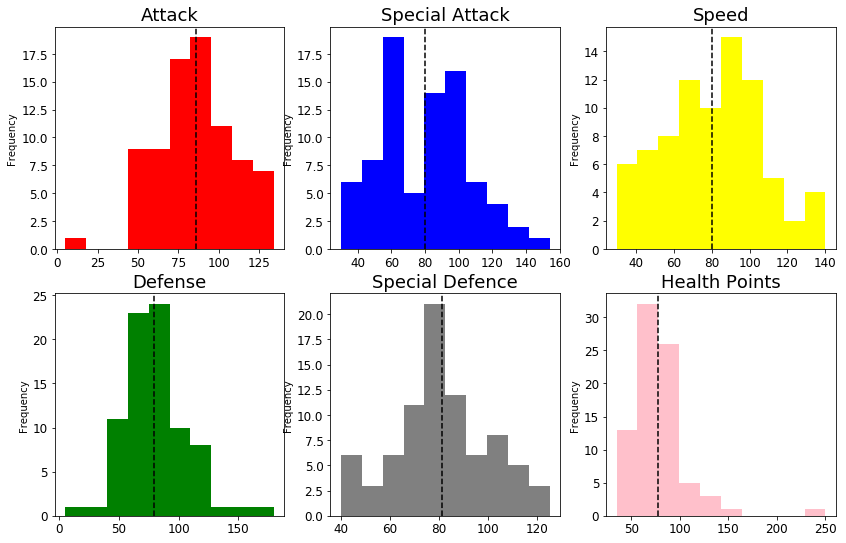

In [18]:
PokemondataframeFinal = Pokemondataframe[(Pokemondataframe['FinalForm'] == True)]
fig, axarr = plt.subplots(2, 3, figsize=(14, 9))

PokemondataframeFinal['Attack'].plot.hist(
    ax=axarr[0][0], fontsize=12, color='red'
)
axarr[0][0].axvline(PokemondataframeFinal['Attack'].mean(),linestyle='dashed',color='black')
axarr[0][0].set_title("Attack", fontsize=18)
PokemondataframeFinal['Defense'].plot.hist(
    ax=axarr[1][0], fontsize=12, color='green'
)
axarr[1][0].axvline(PokemondataframeFinal['Defense'].mean(),linestyle='dashed',color='black')
axarr[1][0].set_title("Defense", fontsize=18)

PokemondataframeFinal['Sp. Atk'].plot.hist(
    ax=axarr[0][1], fontsize=12, color='blue'
)
axarr[0][1].axvline(PokemondataframeFinal['Sp. Atk'].mean(),linestyle='dashed',color='black')
axarr[0][1].set_title("Special Attack", fontsize=18)

PokemondataframeFinal['Sp. Def'].plot.hist(
    ax=axarr[1][1], fontsize=12, color='grey'
)
axarr[1][1].axvline(PokemondataframeFinal['Sp. Def'].mean(),linestyle='dashed',color='black')
axarr[1][1].set_title("Special Defence", fontsize=18)

PokemondataframeFinal['Speed'].plot.hist(
    ax=axarr[0][2], fontsize=12, color='yellow'
)
axarr[0][2].axvline(PokemondataframeFinal['Speed'].mean(),linestyle='dashed',color='black')
axarr[0][2].set_title("Speed", fontsize=18)

PokemondataframeFinal['HP'].plot.hist(
    ax=axarr[1][2], fontsize=12, color='pink'
)
axarr[1][2].axvline(PokemondataframeFinal['HP'].mean(),linestyle='dashed',color='black')
axarr[1][2].set_title("Health Points", fontsize=18)

Seems like even when they reach their final forms, our pokemons keep their characteristics more or ess heteregenous, we can suppose that every pokemon has it's sepciality; if he is strong in attack he is maybe weak in sp Attak for exemple. We move then to the bivariate analysis.

## Bivariate Analysis

### Bivariate analysis quantitative-quantitative

As we did previously we drop the columns that we don't need to focus on the continuous ones

In [19]:
corr_matrix=Pokemondataframe.drop(['#','Legendary','Stage','Total'],axis=1).corr()
corr_matrix

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


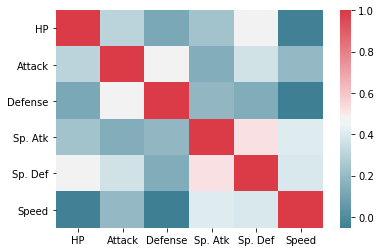

In [20]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap)

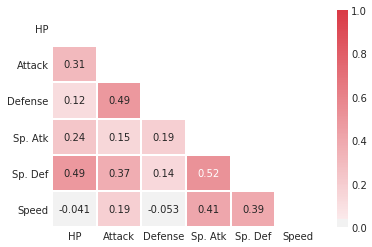

In [21]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix,fmt=".2g",annot=True,cmap=cmap,linewidths=1,cbar=True,vmin=0, vmax=1,center=0,mask=mask)



even that we don't have a real strong correlation we can make some conclusion from this :
* Attack-Defence = 0.49 , both attack and defence are physical abilities so there is a relationship between them, a pokemon with high attack will have a strong defence and vice-versa 
* Same thing goes for Sp.Attak and Sp.defence which are more related to magical abilities and distance fighting
* Speed-Hp and Speed-Defence are negative correlations, that explains that pokemons which have defensive profile are slower
* Speed-Sp attack and Speed-Sp Defence are pretty high correlations, it's pretty curious because these abilities are for pokemons that can handle distance fighting.. But we can explain it by the fact that speed let the pokemon take distance with his opponent so that's why the more a pokemon is likely to be a long range fighter the more he is fast so that he can put distance with his opponent in case of a physical attak

### Bivariate analysis qualitative-qualitative

We start by creating a frequency table for the qualitative values type 1 and type 2 to see how often an association between two types occurs 

In [22]:
cont = pd.crosstab(Pokemondataframe['Type 1'],Pokemondataframe["Type 2"])
cont

Type 2,Fairy,Fighting,Flying,Grass,Ground,Ice,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,
Bug,0,0,2,2,0,0,5,0,0,0,0
Dragon,0,0,1,0,0,0,0,0,0,0,0
Electric,0,0,1,0,0,0,0,0,0,2,0
Fire,0,0,2,0,0,0,0,0,0,0,0
Ghost,0,0,0,0,0,0,3,0,0,0,0
Grass,0,0,0,0,0,0,9,2,0,0,0
Ground,0,0,0,0,0,0,0,0,2,0,0
Ice,0,0,1,0,0,0,0,1,0,0,0
Normal,2,0,8,0,0,0,0,0,0,0,0


In [23]:
chi2, p, dof, expected = stats.chi2_contingency(cont, correction=False)
alpha = 0.05

if p <= alpha:
    print("Dependent (reject Hypothesis) p-value =",p)
else:
    print("Independent (fail to reject H0)",p)

Dependent (reject H0) p-value = 8.23976023414262e-16


### Bivariate analysis on quantitative-qualitative

In [24]:
meanDataframe=PokemondataframeFinal.groupby('Type 1', as_index=False)['Total'].mean()
meanDataframe.columns = meanDataframe.columns.str.replace(' ', '')
meanDataframe

,Type1,Total
0,Bug,440.833333
1,Dragon,600.000000
2,Electric,504.166667
3,Fairy,483.000000
4,Fighting,467.500000
5,Fire,527.714286
6,Ghost,500.000000
7,Grass,492.000000
8,Ground,441.250000
9,Ice,517.500000


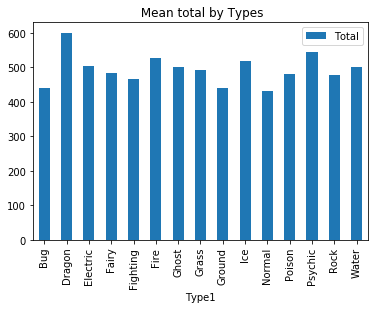

In [25]:
meanDataframe.plot(kind = 'bar', title = ' Mean total by Types',x='Type1')

This plot is very interesting, it shows us that there is differences in term of strength between the different types of pokemon, the Bug types seems to be the weakest one and the dragon type is the strongest. Let's confirm this by performing ANOVA to validate that there is a correlation between Types and strenngth. This mean that the means of strength between types is significant so we can suppose that there is a correlation between the strength of pokemons and their types.

We have to perform this command to get the statsmodels libarary 

!pip install statsmodels

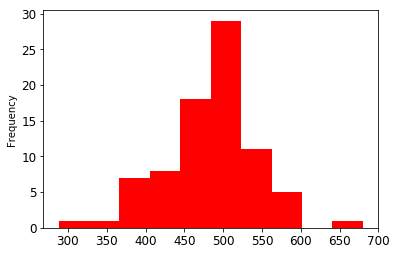

In [26]:
PokemondataframeFinal['Total'].plot.hist(fontsize=12, color='red')

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
PokemondataframeFinal.columns = PokemondataframeFinal.columns.str.replace(' ', '')
results = ols('Total ~ Type1',data=PokemondataframeFinal).fit()
table = sm.stats.anova_lm(results, typ=2)
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.267
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           0.000576
Time:                        09:57:12   Log-Likelihood:                -422.54
No. Observations:                  81   AIC:                             875.1
Df Residuals:                      66   BIC:                             911.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           440.8333     20.168     21.858      0.000     400.566     481.100
Type1[T.Dragon]     159.1667     53.360      2.983      0.004      52.630     265.703
Type1[T.Electric]    63.3333     28.522      2.220      0.030       6.387     120.280
Type1[T.Fairy]       42.1667     53.360      0.790      0.432     -64.370     148.703
Type1[T.Fighting]    26.6667     31.889      0.836      0.406     -37.001      90.335
Type1[T.Fire]        86.8810     27.485      3.161      0.002      32.006     141.756
Type1[T.Ghost]       59.1667     53.360      1.109      0.272     -47.370     165.703
Type1[T.Grass]       51.1667     29.914      1.710      0.092      -8.559     110.892
Type1[T.Ground]       0.4167     31.889      0.013      0.990     -63.251      64.085
Type1[T.Ice]         76.6667     40.336      1.901      0.062      -3.868     157.201
Type1[T.Normal]      -8.0476     24.106     -0.334      0.740     -56.176      40.081
Type1[T.Poison]      41.3333     28.522      1.449      0.152     -15.613      98.280
Type1[T.Psychic]    103.7667     29.914      3.469      0.001      44.041     163.492
Type1[T.Rock]        36.1667     29.914      1.209      0.231     -23.559      95.892
Type1[T.Water]       61.3095     24.106      2.543      0.013      13.181     109.438
==============================================================================
Omnibus:                        3.705   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.971
Skew:                          -0.105   Prob(JB):                        0.137
Kurtosis:                       4.064   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob (F-statistic)= 0.000576 < 0.05 so our p-value < 0.05 so there is a correlation between the types and the strength of the pokemon, our assumption is true!